## Modelo Regresión Casos Covid en el Ecuador

Generar un modelo de regresión de los casos confirmados de COVID dentro del Ecuador, el mismo que permita predecir el comportamiento y/o predicción de la pandemia, tomar los datos desde el inicio e identificar etapas: Confinamiento, Toques de Queda, Feriados, etc.

## VÁSQUEZ FAJARDO FRANKLIN JOEL

## SIMULACIÓN

In [1]:
# Librerias
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt
import altair as alt
print ('Librerias Importadas')

Librerias Importadas


In [2]:
df = pd.read_csv('./datos_ecuador.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ECU,South America,Ecuador,1/3/2020,6.0,6.0,NaN,NaN,NaN,NaN,...,10.581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
1,ECU,South America,Ecuador,2/3/2020,6.0,0.0,NaN,NaN,NaN,NaN,...,10.581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
2,ECU,South America,Ecuador,3/3/2020,7.0,1.0,NaN,NaN,NaN,NaN,...,10.581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
3,ECU,South America,Ecuador,4/3/2020,10.0,3.0,NaN,NaN,NaN,NaN,...,10.581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759
4,ECU,South America,Ecuador,5/3/2020,13.0,3.0,NaN,NaN,NaN,NaN,...,10.581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.759


In [387]:
df = df.loc[: , ["date","total_cases"]]
FMT = '%d/%m/%Y'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/03/2020", FMT)).days)
df = df.dropna()
df = df.drop(df[df['total_cases']<1].index)
df.head()

,date,total_cases
0,0,6.0
1,1,6.0
2,2,7.0
3,3,10.0
4,4,13.0


In [388]:
df.reset_index(inplace=True)
img= alt.Chart(df).mark_line().encode(
x=alt.X('date'),
y=alt.Y('total_cases'),
tooltip=['date', 'total_cases'],
color=alt.condition( alt.datum.total == 1200000,alt.value('green'),alt.value('green')),
column=alt.Column('month(arrived_at)',title='Casos Covid desde 01/03/2020'))
img

alt.Chart(...)

In [389]:
x = list(df.iloc [:, 1]) 
y = list(df.iloc [:, 2])



## Regresión Lineal

In [390]:
#Nuestra Regresión Lineal
lineal = linear_model.LinearRegression()
 
# Entrenamos el modelo
lineal.fit(np.array(x).reshape(-1, 1) ,y)

LinearRegression()

In [391]:
prediction = lineal.predict([[425]])
print(int(prediction )  ,"NUMERO DE CASOS TOTALES AL 30/04/2021")

334050 NUMERO DE CASOS TOTALES AL 30/04/2021


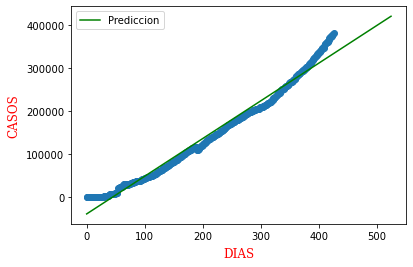

In [392]:
#Graficar
plt.scatter(x, y)
line = np.array(range(min(x), max(x)+100) )
plt.plot(x_real, lineal.predict(line.reshape(-1, 1)), color='green' , label='Prediccion')
plt.xlabel('DIAS' ,family='serif', 
           color='r', 
           weight='normal', 
           size = 12,
           labelpad = 6)
plt.ylabel('CASOS',family='serif', 
           color='r', 
           weight='normal', 
           size = 12,
           labelpad = 6)
plt.legend()
plt.show()

## Regresión Polinomial

In [393]:
p = PolynomialFeatures(degree = 8)
polinomX = p.fit_transform(np.array(x).reshape(-1, 1))
lin = linear_model.LinearRegression()
lin.fit(polinomX, y)

LinearRegression()

In [394]:
prediction = lin.predict(p.fit_transform([[425]]))
print(int(prediction )  ,"NUMERO DE CASOS TOTALES AL 30/04/2021")

387291 NUMERO DE CASOS TOTALES AL 30/04/2021


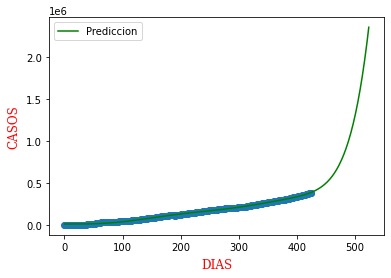

In [395]:
plt.scatter(x, y)
datos = np.array(range(min(x), max(x)+100))
plt.plot(x_real, lin.predict(p.fit_transform(datos.reshape(-1, 1))), color='green', label='Prediccion')
plt.xlabel('DIAS' ,family='serif', 
           color='r', 
           weight='normal', 
           size = 12,
           labelpad = 6)
plt.ylabel('CASOS',family='serif', 
           color='r', 
           weight='normal', 
           size = 12,
           labelpad = 6)
plt.legend()
plt.show()